# MSCOCO Subset
- try mscoco on previous conv net


In [10]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils.data import Dataset

## Data

In [12]:
class data:
    train = Dataset('/data/mscoco/train_data.hdf', '/data/mscoco/train_imgs/', one_hot=False, norm=True)
    validation = Dataset('/data/mscoco/valid_data.hdf', '/data/mscoco/valid_imgs/', one_hot=False, norm=True)

class_id2class_name_mapping = {
    0: 'cow',
    1: 'sheep',
    2: 'giraffe',
    3: 'horse',
    4: 'bird',
    5: 'cat',
    6: 'dog',
    7: 'elephant',
    8: 'bear'}

## Examples Visualization

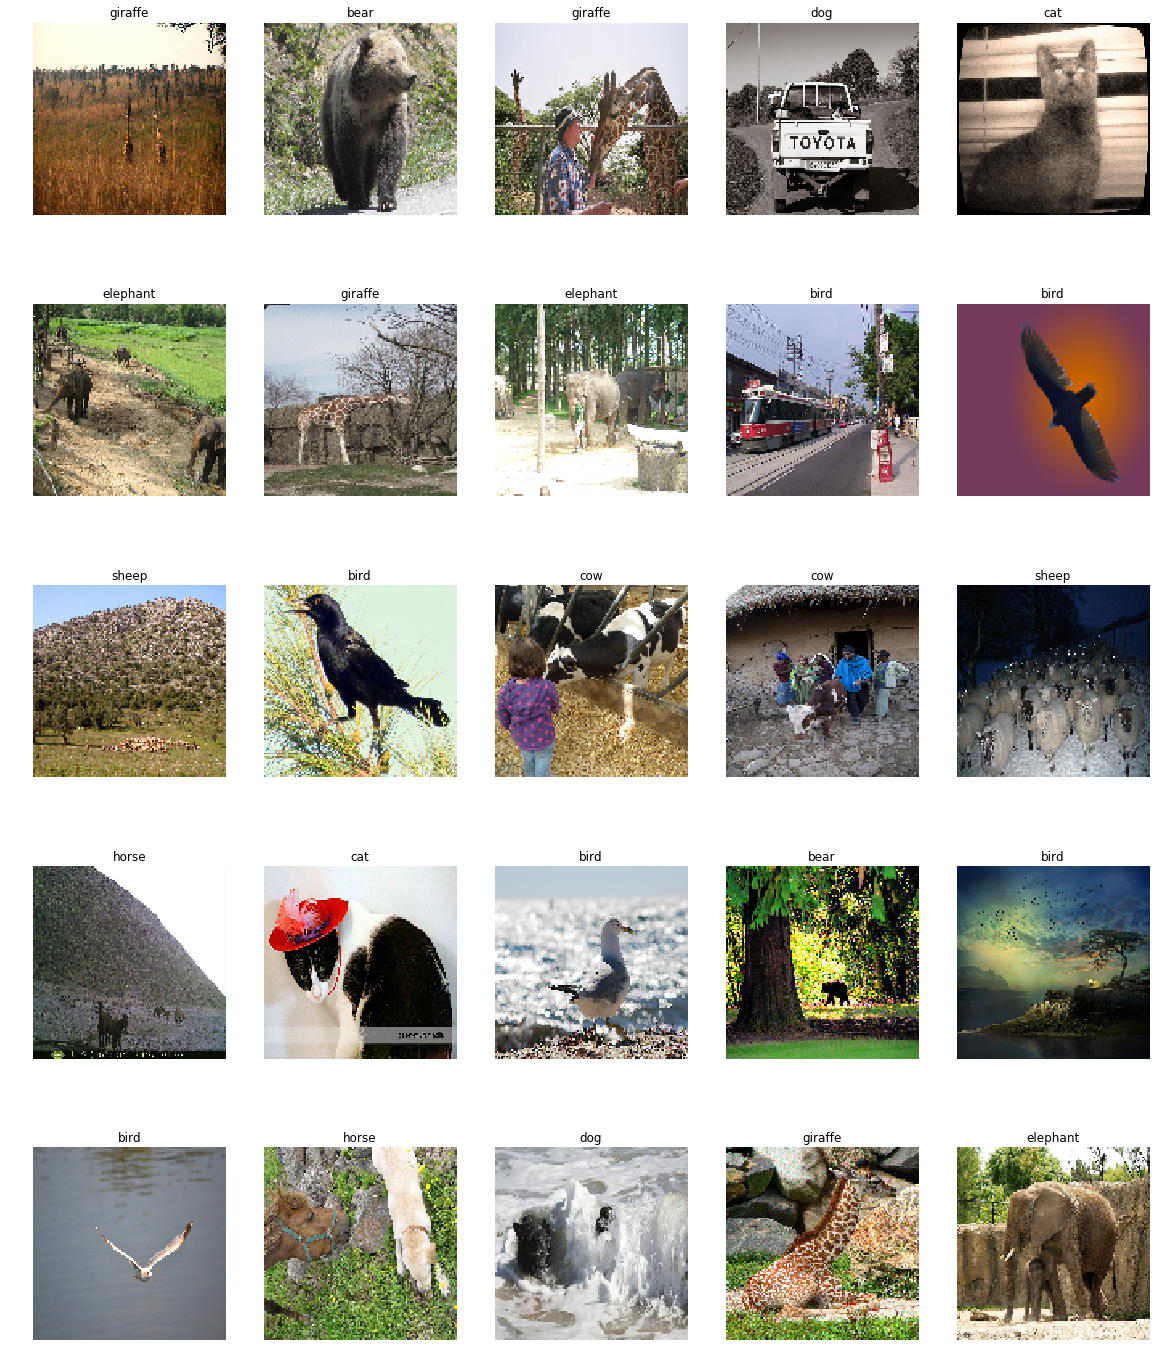

In [13]:
row_img_count = 5
image_size = 120
batch_size = pow(row_img_count, 2)

data.train.image_size = image_size
img_batch, label_batch = data.train.next_batch(batch_size=batch_size)


plt.subplots_adjust(wspace=1.5, hspace=2.5)
fig = plt.figure(figsize=(20,25))

for img_id in range(batch_size):
    ax = plt.subplot(row_img_count, row_img_count, img_id+1)
    
    img = img_batch[img_id].reshape((image_size, image_size, 3))
    class_name = class_id2class_name_mapping[label_batch[img_id]]
    ax.imshow(img , cmap='gray')
    ax.set_title(class_name)
    ax.axes.set_axis_off()

## Distribution visualization 

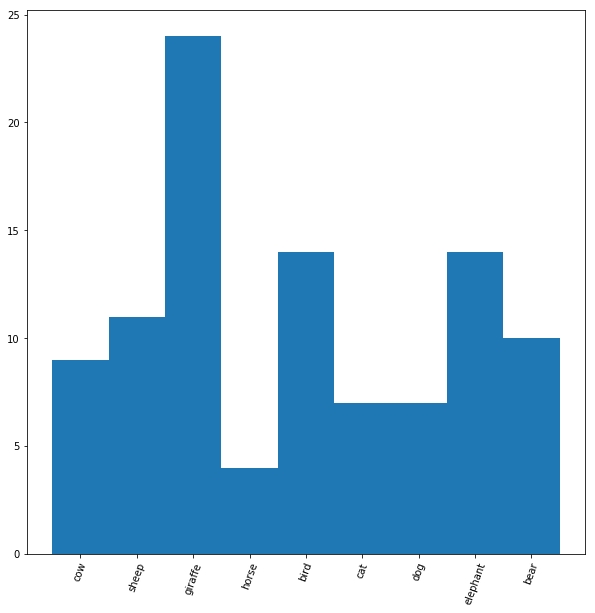

In [14]:
#labels = data.validation.labels
_, labels = data.train.next_batch(100)

fig = plt.figure(figsize=(10, 10))
plt.hist(labels, [i for i in range(10)], 
         label=[class_id2class_name_mapping[i] for i in range(9)],
         align=('left'))
ax = plt.gca()
ax.xaxis.set_ticks(np.arange(0, 9, 1))
ticks = ax.xaxis.set_ticklabels(list(class_id2class_name_mapping.values()), rotation=70)